<font face="Times New Roman" size="3">
<hr style="width:100%;height:2px;color:black">
<div style="width:100%">
    <div style="float:left;width:50%">Albert-Ludwigs-Universität Freiburg</div>
    <div style="float:left;width:50%;text-align:right">Wintersemester 2022/23</div> 
</div>
<div style="clear:both;text-align:center">
    <h1 style="margin-top:20px;padding:0px">Datenanalyse für Naturwissenschaftler*Innen</h1>
    <h2 style="margin:5px;padding:0px">Statistische Methoden in Theorie und Praxis</h2>
    Vorlesung: Dr. Andrea Knue<br />
    Übungsleitung: Dr. Constantin Heidegger<br />
    <h1 style="margin:10px;padding:0px">Übung 12 (Extra) </h1>
    Ausgabe: 27. Januar 2023 10:00 Uhr, Abgabe: 03. Februar 2023 bis 10:00 Uhr via Ilias
</div>
<hr style="font-family:width:100%;height:2px;color:black">
</font>

<font face="Times New Roman" size=3>
    <h3 style="margin:0px">Aufgabe 1: Pearson'scher $\chi^2$-Test (12P)</h3>
</font>

Im Folgenden wollen wir uns noch einmal den Pearson'schen $\chi^2$-Test anschauen. In dieser Aufgabe wollen wir prüfen, ob ein Zufallszahlengenerator eine Gleichverteilung erzeugt oder nicht. Unsere Nullhypothese ist, dass die erzeugte Funktion eine Gleichverteilung ist.

Folgen Sie den Schritten in der Aufgabenstellung. Erklärungen können Sie ebenfalls in die gegebenen Boxen schreiben.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat

<font face="Times New Roman" size=4>
a) Zufallszahlgenerator (1P)
</font>

Wir wollen wieder den allgemeinen linear-kongruenten Zufallszahlengenerator aus Blatt 6 studieren. Dazu können Sie Ihre Implementation von Blatt 6 wiederverwenden und in das folgende Feld einfuügen.

In [2]:
# MM-Approach
def ALGG(a:int, c:int, m:int, I0:int, N:int) -> list[int]:
    I = [0] * N
    I[0] = I0
    for i in range(1, N):
        I[i] = ((I[i - 1] * a)+c) % m
    return I


In [ ]:
# ML-Alternative
# def ALCG(a:int, c:int, m:int, I0:int, N:int) -> list[int]:
#     x = []
#     x.append(I0)
#     for i in range(0, N):
#         alt = x[i] 
#         neu = (a*alt + c) % m # % ist der Modulo-Operator!
#         x.append(neu)
#     return x

<font face="Times New Roman" size=4>
b) Erzeugung der Zufallszahlen (3P)
</font>

Setzen Sie nun die folgenden Parameter ein: `a=49345`, `c=5`, `m=649423` und `I0=3`, und erzeugen Sie damit 5000 Zufallzahlen zwischen 0 und 1. Auch diesen Schritt (die Umwandlung in Zahlen zwischen 0 und 1) haben wir für Blatt 6 schon implementiert. Zeichnen Sie diese Zufallszahlen in ein Histogramm mit 100 Bins. Lassen Sie sich die Bineinträge von der Funktion `plt.hist` zurückgeben und beschriften Sie die Achsen des Histogramms entsprechend. Die zurückgegebenen Bineinträge sind unsere $n_i^D$. 

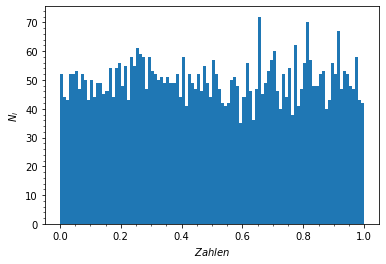

In [4]:
#print("ALGG: ", ALGG(49345, 5, 649423, 3, 5000))

def histo(a, c, m, I0, N):
    numbers = ALGG(a, c, m, I0, N)
    x = np.array(numbers)/m  
    #plt.hist(x, bins=100)
    
    #MM approach
    data = list()
    for i in ALGG(a, c, m, I0, N): 
        data.append(i/m)
    bins = plt.hist(data, bins=100)

    #print(f"vbins: {bins}")
    plt.xlabel("$Zahlen$")
    plt.ylabel("$N_{i}$")
    plt.minorticks_on()
    plt.show

histo(49345, 5, 649423, 3, 5000)

<font face="Times New Roman" size=4>
c) Freiheitsgrade (1P)
</font>

Überlegen Sie sich nun, wieviele Einträge $n_i^M$ Sie pro Bin erwarten. Wieviele Freiheitsgrade $n_F$ haben wir?

<font face="Times New Roman" size=4>
d) Berechnung des Pearson'schen $\chi^2$ (1P)
</font>

Schreiben Sie nun eine Funktion `CalcChi2`, welche das Pearson'sche $\chi^2$ berechnet und zurückgibt.

In [ ]:
def CalcChi2(observed, expected):
    chi2 = np.sum((observed - expected)**2 / expected)
    return chi2


<font face="Times New Roman" size=4>
e) Diskussion (2P)
</font>

Welches $\chi^2$ und welche Varianz erwartet man bei dieser Anzahl von Freiheitsgraden? Liegt der $\chi^2$-Wert Ihrer Stichprobe nahe dem erwarteten Wert und ist mit einer Gleichverteilung verträglich? Schreiben Sie Ihre Antwort ins folgende Feld.

<font face="Times New Roman" size=4>
f) Wahrscheinlichkeitsberechnung (1P)
</font>

Berechnen Sie nun die Wahrscheinlichkeit, einen Wert $\chi^2 \geq \chi^2$ zu bekommen. Dazu koennen Sie das `chi2`-Modul von `scipy.stats` und der dort implementierten Kumulativverteilung verwenden. Schauen Sie sich dazu diese Dokumentation an: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html .

In [ ]:
def CalcPValue(chi2_observed, df):
    p_value = stat.chi2.sf(chi2_observed, df)
    return p_value


<font face="Times New Roman" size=4>
g) Visualisierung (3P)
</font>

Wie in der Vorlesung besprochen sollten man sich falls moeglich auch immer die berechneten Werte visualisieren. Zeichnen Sie nun die $\chi^2$-Verteilung fuer Ihre Anzahl von Freiheitsgraden. Eine einfache Moeglichkeit finden Sie in der oben gegebenen Dokumentation. Zeichnen Sie zusaetzlich Ihr Stichproben-$\chi^2$ als vertikale Linie ein (z.B. mit plt.axvline) und beschriften Sie alle Achsen.

In [ ]:
def PlotChi2Distribution(df, chi2_observed):
    x = np.linspace(0, stat.chi2.ppf(0.999, df), 1000)
    plt.plot(x, stat.chi2.pdf(x, df), label='$\chi^2$-Verteilung')
    plt.axvline(chi2_observed, color='red', label='Stichproben-$\chi^2$')
    plt.xlabel('$\chi^2$')
    plt.ylabel('Wahrscheinlichkeit')
    plt.legend()
    plt.show()